In [ ]:
import os
import sys
sys.path.append("..")
from parser import parse_champions_league_directory

In [3]:
# 노트북 셀 2: 데이터 로드
root = "/home/work/data/MHL/skill-vs-luck/champions-league"
df_cl = parse_champions_league_directory(root, min_season="2010-11")

print(f"\n총 시즌 수: {df_cl['season'].nunique()}")
print(f"총 경기 수: {len(df_cl)}")
print(f"\n시즌별 경기 수:")
print(df_cl['season'].value_counts().sort_index())
print(f"\nStage별 경기 수:")
print(df_cl['stage'].value_counts())
print(f"\n샘플 데이터:")
df_cl.head(10)

✓ Parsed 2011-12: 125 matches
✓ Parsed 2012-13: 125 matches
✓ Parsed 2013-14: 125 matches
✓ Parsed 2014-15: 125 matches
✓ Parsed 2015-16: 125 matches
✓ Parsed 2016-17: 125 matches
✓ Parsed 2017-18: 125 matches
✓ Parsed 2018-19: 125 matches
✓ Parsed 2019-20: 119 matches
✓ Parsed 2020-21: 125 matches
✓ Parsed 2021-22: 125 matches
✓ Parsed 2022-23: 125 matches
✓ Parsed 2023-24: 125 matches
✓ Parsed 2024-25: 189 matches
✓ Parsed 2025-26: 72 matches

총 시즌 수: 15
총 경기 수: 1880

시즌별 경기 수:
season
2011-12    125
2012-13    125
2013-14    125
2014-15    125
2015-16    125
2016-17    125
2017-18    125
2018-19    125
2019-20    119
2020-21    125
2021-22    125
2022-23    125
2023-24    125
2024-25    189
2025-26     72
Name: count, dtype: int64

Stage별 경기 수:
stage
Group Stage      1176
Other             304
Round of 16       224
Quarterfinals     108
Semifinals         54
Final              14
Name: count, dtype: int64

샘플 데이터:


,season,date,time,stage,section,home_team,away_team,home_goals,away_goals,ht_home,ht_away,has_penalty,has_aet,source_file
0,2011-12,2011-09-14,20.45,Group Stage,Group A,Manchester City,SSC Napoli,1,1,0.0,0.0,False,False,cl.txt
1,2011-12,2011-09-14,None,Group Stage,Group A,Villarreal CF,Bayern München,0,2,0.0,1.0,False,False,cl.txt
2,2011-12,2011-09-27,20.45,Group Stage,Group A,Bayern München,Manchester City,2,0,2.0,0.0,False,False,cl.txt
3,2011-12,2011-09-27,None,Group Stage,Group A,SSC Napoli,Villarreal CF,2,0,2.0,0.0,False,False,cl.txt
4,2011-12,2011-10-18,20.45,Group Stage,Group A,Manchester City,Villarreal CF,2,1,1.0,1.0,False,False,cl.txt
5,2011-12,2011-10-18,None,Group Stage,Group A,SSC Napoli,Bayern München,1,1,1.0,1.0,False,False,cl.txt
6,2011-12,2011-11-02,20.45,Group Stage,Group A,Bayern München,SSC Napoli,3,2,3.0,1.0,False,False,cl.txt
7,2011-12,2011-11-02,None,Group Stage,Group A,Villarreal CF,Manchester City,0,3,0.0,2.0,False,False,cl.txt
8,2011-12,2011-11-22,20.45,Group Stage,Group A,Bayern München,Villarreal CF,3,1,2.0,0.0,False,False,cl.txt
9,2011-12,2011-11-22,None,Group Stage,Group A,SSC Napoli,Manchester City,2,1,1.0,1.0,False,False,cl.txt


In [ ]:
save_path = "/home/work/data/dataset/MHL/mat-hist/ucl"
if not os.path.exists(save_path):
    os.makedirs(save_path, exist_ok=True)
    df_cl.to_csv(os.path.join(save_path, "champions-league.csv"), index=False)


In [122]:
# 데이터 전처리: Champions League 형식에 맞게 변환
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import Dict
from datetime import datetime

df_cl = pd.read_csv(os.path.join(save_path, "champions-league.csv"))
# df_cl = df_cl[(df_cl['stage'] == 'Group Stage') | (df_cl['stage'] == 'Other')]

# 데이터 형식 변환: football-data.co.uk 형식으로
df_cl['Date'] = pd.to_datetime(df_cl['date'])
df_cl['HomeTeam'] = df_cl['home_team']
df_cl['AwayTeam'] = df_cl['away_team']
df_cl['FTHG'] = df_cl['home_goals']
df_cl['FTAG'] = df_cl['away_goals']
df_cl['division'] = 'UCL'  # UEFA Champions League

# data_dict 형식으로 변환
data_dict_ucl = {}
for season in df_cl['season'].unique():
    season_data = df_cl[df_cl['season'] == season].copy()
    data_dict_ucl[str(season)] = {'UCL': season_data}

print(f"시즌 수: {len(data_dict_ucl)}")
for season in sorted(data_dict_ucl.keys()):
    n_matches = len(data_dict_ucl[season]['UCL'])
    n_teams = len(set(data_dict_ucl[season]['UCL']['HomeTeam']).union(
                     set(data_dict_ucl[season]['UCL']['AwayTeam'])))
    print(f"  {season}: {n_matches} matches, {n_teams} teams")


시즌 수: 15
  2011-12: 125 matches, 32 teams
  2012-13: 125 matches, 32 teams
  2013-14: 125 matches, 32 teams
  2014-15: 125 matches, 32 teams
  2015-16: 125 matches, 32 teams
  2016-17: 125 matches, 32 teams
  2017-18: 125 matches, 32 teams
  2018-19: 125 matches, 32 teams
  2019-20: 119 matches, 32 teams
  2020-21: 125 matches, 32 teams
  2021-22: 125 matches, 32 teams
  2022-23: 125 matches, 32 teams
  2023-24: 125 matches, 32 teams
  2024-25: 189 matches, 36 teams
  2025-26: 72 matches, 36 teams


# 1. Ver1. SIAM Website R-value 계산


In [123]:
def _ensure_datetime(df: pd.DataFrame):
    if not np.issubdtype(df["Date"].dtype, np.datetime64):
        df = df.copy()
        df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
    return df

def _team_rows(df: pd.DataFrame, team: str, method: str="original") -> pd.DataFrame:
    # Build per-team match list with perspective columns
    home = df[df["HomeTeam"]==team].copy()
    away = df[df["AwayTeam"]==team].copy()
    home["gf"] = home["FTHG"]; home["ga"] = home["FTAG"]; home["venue"] = "H"
    away["gf"] = away["FTAG"]; away["ga"] = away["FTHG"]; away["venue"] = "A"
    # points and outcomes
    goal_diff = home["gf"] - home["ga"]
    home["win"]  = (goal_diff > 0).astype(int)
    home["draw"] = (goal_diff == 0).astype(int)
    home["loss"] = (goal_diff < 0).astype(int)
    home["pts"]  = home["win"]*3 + home["draw"]*1

    goal_diff = away["gf"] - away["ga"]
    away["win"]  = (goal_diff > 0).astype(int)
    away["draw"] = (goal_diff == 0).astype(int)
    away["loss"] = (goal_diff < 0).astype(int)
    away["pts"]  = away["win"]*3 + away["draw"]*1

    # Unify
    if method == "original":
        cols = ["Date","venue","gf","ga","win","draw","loss","pts"]
    elif method == "ours":
        cols = ["Date","venue","gf","ga","win","draw","loss","pts","HomeElo","AwayElo"]
    home_part = home[cols]
    away_part = away[cols]
    t = pd.concat([home_part, away_part], ignore_index=True)
    t = t.sort_values("Date")
    return t

def _half_metric(rows: pd.DataFrame, metric_mode: str="ppg") -> tuple:
    n = len(rows)
    if n == 0:
        return np.nan, np.nan
    k = n//2  # first k matches as "first half", rest as "second half"
    first = rows.iloc[:k]
    second = rows.iloc[k:]
    if metric_mode == "ppg":
        # Points per game normalized to [0,1]: ppg / 3
        x = (first["pts"].sum() / max(1, len(first))) / 3.0
        y = (second["pts"].sum() / max(1, len(second))) / 3.0
    elif metric_mode == "winfrac":
        # Win fraction: wins / matches (draws count as 0)
        x = first["win"].sum() / max(1, len(first))
        y = second["win"].sum() / max(1, len(second))
    else:
        raise ValueError("metric_mode must be 'ppg' or 'winfrac'")
    return float(x), float(y)

def compute_siam_R(data_dict: Dict[str, Dict[str, pd.DataFrame]], metric_mode: str="ppg"):
    rows = []
    for season, divmap in data_dict.items():
        for division, df in divmap.items():
            df = _ensure_datetime(df)
            df = df.dropna(subset=['HomeTeam', 'AwayTeam'])
            teams = sorted(set(df["HomeTeam"]).union(set(df["AwayTeam"])))
            xy = []
            for team in teams:
                trows = _team_rows(df, team)
                x, y = _half_metric(trows, metric_mode=metric_mode)
                if np.isfinite(x) and np.isfinite(y):
                    xy.append((x,y))
            if len(xy) < 3:
                continue
            X = np.array([u for u,v in xy], dtype=float)
            Y = np.array([v for u,v in xy], dtype=float)
            # Rotate by 45 degrees: S=(X+Y)/sqrt(2), T=(Y-X)/sqrt(2)
            S = (X + Y) / np.sqrt(2.0)
            T = (Y - X) / np.sqrt(2.0)
            A = float(np.var(S, ddof=0))
            B = float(np.var(T, ddof=0))
            if A <= 1e-12:
                R = np.nan
            else:
                R = 1.0 - (B / A)
            rows.append({"division": division, "season": season, "teams": len(xy),
                         "metric_mode": metric_mode, "A_var_S": A, "B_var_T": B, "R": R})
    out = pd.DataFrame(rows).sort_values(["division","season"])
    return out


In [124]:
season, divmap = list(data_dict_ucl.items())[0]
df = divmap['UCL']
df = _ensure_datetime(df)
df.head()

,season,date,time,stage,section,home_team,away_team,home_goals,away_goals,ht_home,ht_away,has_penalty,has_aet,source_file,Date,HomeTeam,AwayTeam,FTHG,FTAG,division
0,2011-12,2011-09-14,20.45,Group Stage,Group A,Manchester City,SSC Napoli,1,1,0.0,0.0,False,False,cl.txt,2011-09-14,Manchester City,SSC Napoli,1,1,UCL
1,2011-12,2011-09-14,NaN,Group Stage,Group A,Villarreal CF,Bayern München,0,2,0.0,1.0,False,False,cl.txt,2011-09-14,Villarreal CF,Bayern München,0,2,UCL
2,2011-12,2011-09-27,20.45,Group Stage,Group A,Bayern München,Manchester City,2,0,2.0,0.0,False,False,cl.txt,2011-09-27,Bayern München,Manchester City,2,0,UCL
3,2011-12,2011-09-27,NaN,Group Stage,Group A,SSC Napoli,Villarreal CF,2,0,2.0,0.0,False,False,cl.txt,2011-09-27,SSC Napoli,Villarreal CF,2,0,UCL
4,2011-12,2011-10-18,20.45,Group Stage,Group A,Manchester City,Villarreal CF,2,1,1.0,1.0,False,False,cl.txt,2011-10-18,Manchester City,Villarreal CF,2,1,UCL


In [125]:
df.tail()

,season,date,time,stage,section,home_team,away_team,home_goals,away_goals,ht_home,ht_away,has_penalty,has_aet,source_file,Date,HomeTeam,AwayTeam,FTHG,FTAG,division
120,2011-12,2012-04-17,20.45,Semifinals,Semifinals,Bayern München,Real Madrid,2,1,1.0,0.0,False,False,cl.txt,2012-04-17,Bayern München,Real Madrid,2,1,UCL
121,2011-12,2012-04-18,20.45,Semifinals,Semifinals,Chelsea FC,FC Barcelona,1,0,1.0,0.0,False,False,cl.txt,2012-04-18,Chelsea FC,FC Barcelona,1,0,UCL
122,2011-12,2012-04-24,20.45,Semifinals,Semifinals,FC Barcelona,Chelsea FC,2,2,2.0,1.0,False,False,cl.txt,2012-04-24,FC Barcelona,Chelsea FC,2,2,UCL
123,2011-12,2012-04-25,20.45,Semifinals,Semifinals,Real Madrid,Bayern München,1,3,NaN,NaN,True,True,cl.txt,2012-04-25,Real Madrid,Bayern München,1,3,UCL
124,2011-12,2012-05-19,20.45,Final,Final,Bayern München,Chelsea FC,3,4,NaN,NaN,True,True,cl.txt,2012-05-19,Bayern München,Chelsea FC,3,4,UCL


In [126]:
teams = sorted(set(df["HomeTeam"]).union(set(df["AwayTeam"])))
team = teams[0]

for team in teams:
    trows = _team_rows(df, team)
    if len(trows) > 6:
        print(team, trows)
        break

AC Milan         Date venue  gf  ga  win  draw  loss  pts
5 2011-09-13     A   2   2    0     1     0    1
0 2011-09-28     H   2   0    1     0     0    3
1 2011-10-19     H   2   0    1     0     0    3
6 2011-11-01     A   1   1    0     1     0    1
2 2011-11-23     H   2   3    0     0     1    0
7 2011-12-06     A   2   2    0     1     0    1
3 2012-02-15     H   4   0    1     0     0    3
8 2012-03-06     A   0   3    0     0     1    0
4 2012-03-28     H   0   0    0     1     0    1
9 2012-04-03     A   1   3    0     0     1    0


In [127]:
# SIAM R-value 계산 (ppg)
res_siam_ppg = compute_siam_R(data_dict_ucl, metric_mode="ppg")
print("SIAM R-values (ppg):")
print(res_siam_ppg.to_string(index=False))


SIAM R-values (ppg):
division  season  teams metric_mode  A_var_S  B_var_T        R
     UCL 2011-12     32         ppg 0.082410 0.026655 0.676559
     UCL 2012-13     32         ppg 0.078251 0.050790 0.350944
     UCL 2013-14     32         ppg 0.098326 0.028530 0.709846
     UCL 2014-15     32         ppg 0.079957 0.062142 0.222804
     UCL 2015-16     32         ppg 0.080722 0.036543 0.547300
     UCL 2016-17     32         ppg 0.092481 0.034694 0.624856
     UCL 2017-18     32         ppg 0.105284 0.043343 0.588325
     UCL 2018-19     32         ppg 0.076608 0.049545 0.353268
     UCL 2019-20     32         ppg 0.102315 0.034727 0.660587
     UCL 2020-21     32         ppg 0.108943 0.032560 0.701131
     UCL 2021-22     32         ppg 0.092205 0.041211 0.553051
     UCL 2022-23     32         ppg 0.092845 0.028837 0.689402
     UCL 2023-24     32         ppg 0.087408 0.043183 0.505957
     UCL 2024-25     36         ppg 0.085110 0.032757 0.615118
     UCL 2025-26     36         pp

In [128]:
# SIAM R-value 계산 (winfrac)
res_siam_winfrac = compute_siam_R(data_dict_ucl, metric_mode="winfrac")
print("SIAM R-values (winfrac):")
print(res_siam_winfrac.to_string(index=False))


SIAM R-values (winfrac):
division  season  teams metric_mode  A_var_S  B_var_T        R
     UCL 2011-12     32     winfrac 0.085726 0.040122 0.531971
     UCL 2012-13     32     winfrac 0.078161 0.061531 0.212765
     UCL 2013-14     32     winfrac 0.107158 0.034701 0.676165
     UCL 2014-15     32     winfrac 0.089617 0.085235 0.048895
     UCL 2015-16     32     winfrac 0.088208 0.038086 0.568221
     UCL 2016-17     32     winfrac 0.100661 0.035632 0.646024
     UCL 2017-18     32     winfrac 0.117103 0.045200 0.614016
     UCL 2018-19     32     winfrac 0.087200 0.063362 0.273375
     UCL 2019-20     32     winfrac 0.114479 0.036389 0.682135
     UCL 2020-21     32     winfrac 0.121159 0.036732 0.696831
     UCL 2021-22     32     winfrac 0.105516 0.049919 0.526906
     UCL 2022-23     32     winfrac 0.095442 0.032419 0.660322
     UCL 2023-24     32     winfrac 0.093183 0.058520 0.371985
     UCL 2024-25     36     winfrac 0.081326 0.032004 0.606466
     UCL 2025-26     36     wi

/tmp/ipykernel_712895/3910459864.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(data, vert=False, labels=[title], manage_ticks=True, whis=[5,95], showmeans=True)


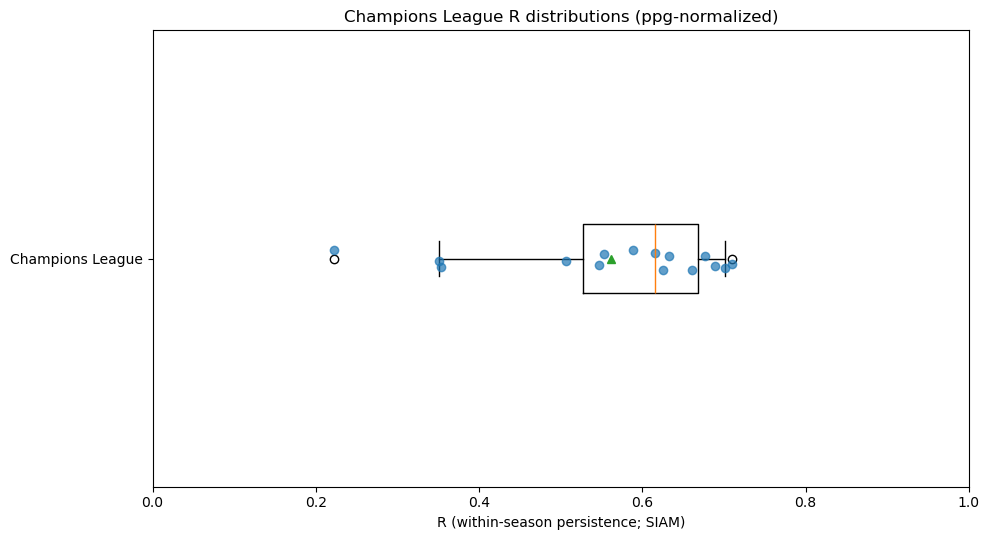

In [129]:
# 시각화
def plot_siam_R_boxplot(df: pd.DataFrame, metric_mode: str = "ppg", title: str = "Champions League"):
    if "metric_mode" in df.columns:
        df = df[df["metric_mode"].astype(str).str.lower()==metric_mode]

    plt.figure(figsize=(10, 5.5))
    
    # Prepare boxplot data
    data = [df["R"].dropna().values]
    
    # Horizontal boxplot
    bp = plt.boxplot(data, vert=False, labels=[title], manage_ticks=True, whis=[5,95], showmeans=True)

    # Overlay points for each season
    vals = df["R"].dropna().values
    if len(vals) > 0:
        y = np.full_like(vals, 1.0, dtype=float) + (np.random.rand(len(vals))-0.5)*0.06
        plt.plot(vals, y, "o", markersize=6, alpha=0.7)

    plt.xlabel("R (within-season persistence; SIAM)")
    plt.title(f"Champions League R distributions ({metric_mode}-normalized)")
    plt.xlim(0, 1)
    plt.tight_layout()
    plt.show()

plot_siam_R_boxplot(res_siam_ppg, metric_mode="ppg")


/tmp/ipykernel_712895/3910459864.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(data, vert=False, labels=[title], manage_ticks=True, whis=[5,95], showmeans=True)


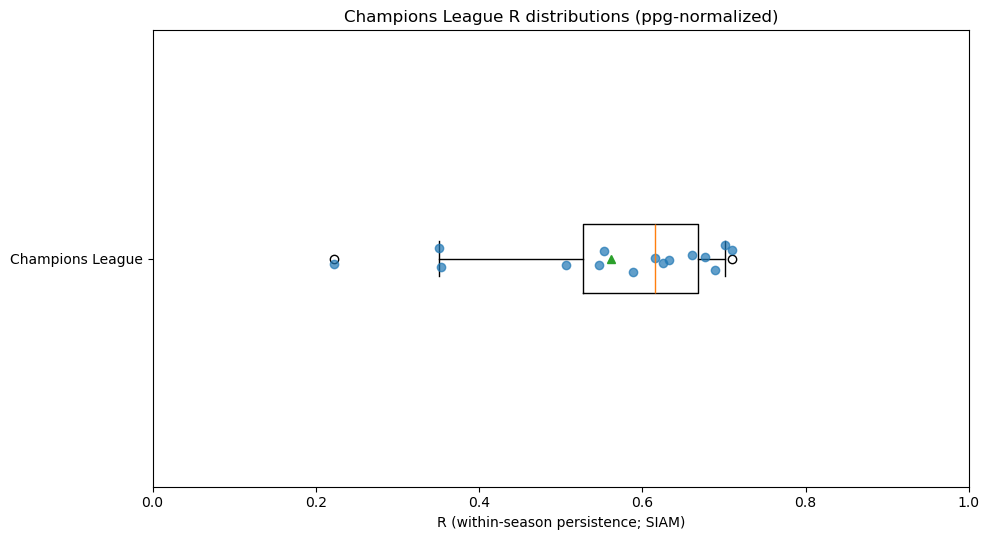

In [130]:
plot_siam_R_boxplot(res_siam_ppg, metric_mode="ppg")

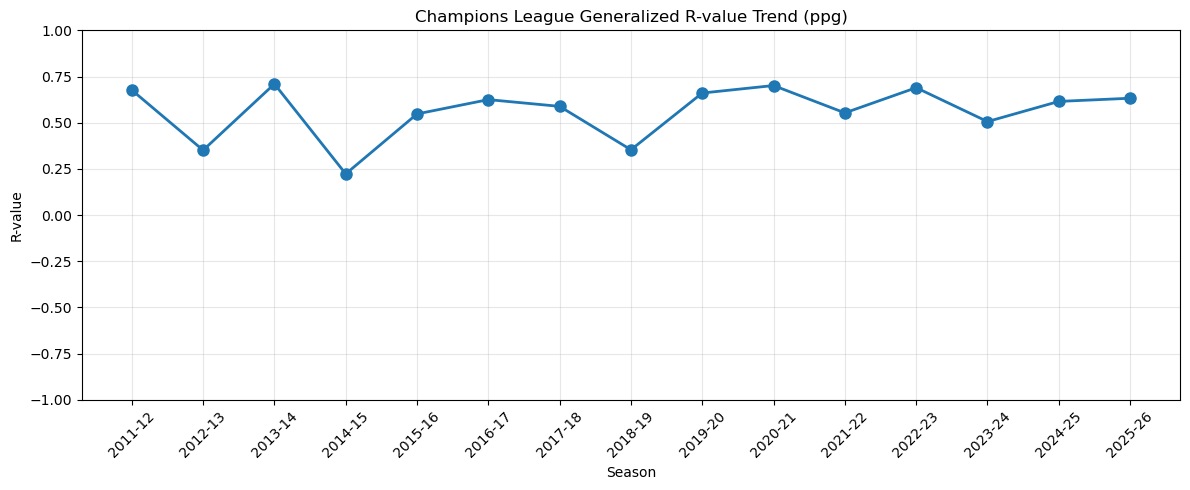

In [131]:
# 시각화: Generalized R trend over seasons
def plot_ucl_trend(df: pd.DataFrame, title: str = "Champions League R-value Trend"):
    """Plot R-value trend over seasons"""
    plt.figure(figsize=(12, 5))

    df_sorted = df.sort_values('season')

    plt.plot(df_sorted['season'].astype(str), df_sorted['R'], 'o-', linewidth=2, markersize=8)
    plt.xlabel("Season")
    plt.ylabel("R-value")
    plt.title(title)
    plt.ylim(-1, 1)
    plt.grid(alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_ucl_trend(res_siam_ppg, "Champions League Generalized R-value Trend (ppg)")


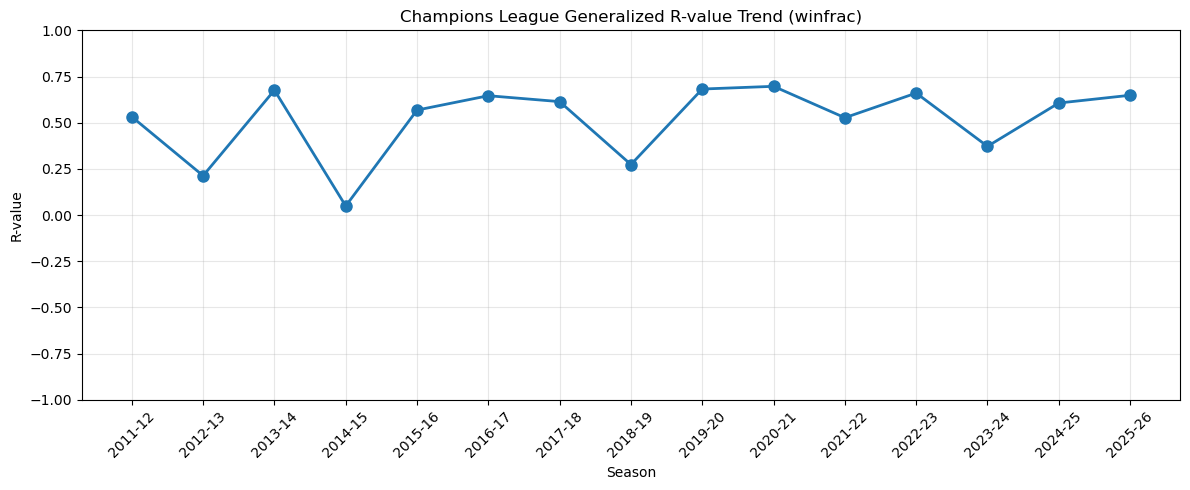

In [132]:
plot_ucl_trend(res_siam_winfrac, "Champions League Generalized R-value Trend (winfrac)")

# 3. Our Method (Generalized-R)


In [133]:
# Elo Rating System
def update_elo(R_i, R_j, outcome_i, K=20, H=0):
    """Update Elo ratings after a single match"""
    E_i = 1.0 / (1 + 10 ** ((R_j - R_i + H) / 400))
    E_j = 1.0 - E_i
    R_i_new = R_i + K * (outcome_i - E_i)
    R_j_new = R_j + K * ((1 - outcome_i) - E_j)
    return R_i_new, R_j_new

def compute_elo_ratings(df, base_rating=1500, K=20):
    """Compute Elo ratings for all teams, tracking pre-match ratings"""
    teams = sorted(set(df["HomeTeam"]).union(set(df["AwayTeam"])))
    ratings = {t: base_rating for t in teams}
    pre_elos = []

    for _, row in df.sort_values("Date").iterrows():
        ht, at = row["HomeTeam"], row["AwayTeam"]
        hg, ag = row["FTHG"], row["FTAG"]

        if hg > ag:
            outcome_h = 1.0
        elif hg == ag:
            outcome_h = 0.5
        else:
            outcome_h = 0.0

        R_h, R_a = ratings[ht], ratings[at]
        pre_elos.append({
            "Date": row["Date"],
            "HomeTeam": ht,
            "AwayTeam": at,
            "HomeElo": R_h,
            "AwayElo": R_a
        })

        new_R_h, new_R_a = update_elo(R_h, R_a, outcome_h, K=K)
        ratings[ht], ratings[at] = new_R_h, new_R_a

    pre_df = pd.DataFrame(pre_elos)
    df = df.merge(pre_df, on=["Date", "HomeTeam", "AwayTeam"], how="left")
    return df


In [134]:
# Stratified Splitting Functions
def stratified_split(team_df, rng, eps=0.05, metric_mode="ppg"):
    """
    Split team matches into two folds (A, B) balanced by opponent Elo.
    Uses stratification with random tie-breaking.
    """
    matches = team_df.copy()
    matches = matches.sort_values("Date")

    # Get opponent Elo ratings
    opp_elos = []
    for _, row in matches.iterrows():
        if row["venue"] == "H":
            opp_elos.append(row["AwayElo"])
        else:
            opp_elos.append(row["HomeElo"])
    matches["opp_elo"] = opp_elos

    # Bin by Elo quartiles
    bins = pd.qcut(matches["opp_elo"], q=min(5, len(matches)), duplicates="drop")
    matches["elo_bin"] = bins

    A_idx, B_idx = [], []
    for _, g in matches.groupby("elo_bin", observed=True):
        idxs = g.index.tolist()
        rng.shuffle(idxs)
        half = len(idxs) // 2
        A_idx.extend(idxs[:half])
        B_idx.extend(idxs[half:])

    A = matches.loc[A_idx]
    B = matches.loc[B_idx]

    return A, B

def performance_metric(fold_df, metric_mode="ppg"):
    """Calculate performance metric for a fold"""
    if len(fold_df) == 0:
        return np.nan
    if metric_mode == "ppg":
        pts = fold_df["pts"].sum()
        return (pts / len(fold_df)) / 3.0
    elif metric_mode == "winfrac":
        wins = fold_df["win"].sum()
        return wins / len(fold_df)
    else:
        raise ValueError("metric_mode must be 'ppg' or 'winfrac'")


In [135]:
# Generalized R Computation
def compute_generalized_R(data_dict, metric_mode="ppg", K=200, seed=123):
    """
    Compute Generalized R-value using stratified splitting.

    Parameters:
    - data_dict: nested dict {season: {division: DataFrame}}
    - metric_mode: 'ppg' (points per game) or 'winfrac' (win fraction)
    - K: number of random splits per team
    - seed: random seed for reproducibility
    """
    rng = np.random.default_rng(seed)
    rows = []

    for season, divmap in data_dict.items():
        for division, df in divmap.items():
            # Compute Elo ratings
            df = df[(df['HomeTeam'].notna()) & (df['AwayTeam'].notna())]
            df = compute_elo_ratings(df)

            teams = sorted(set(df["HomeTeam"]).union(set(df["AwayTeam"])))
            XY_all = []

            for team in teams:
                trows = _team_rows(df, team, method="ours")
                if len(trows) < 4:
                    continue

                # K random splits per team
                for k in range(K):
                    A, B = stratified_split(trows, rng, metric_mode=metric_mode)
                    x = performance_metric(A, metric_mode)
                    y = performance_metric(B, metric_mode)
                    if np.isfinite(x) and np.isfinite(y):
                        XY_all.append((x, y))

            if len(XY_all) >= 3:
                X = np.array([u for u, v in XY_all])
                Y = np.array([v for u, v in XY_all])
                S = (X + Y) / np.sqrt(2)
                T = (Y - X) / np.sqrt(2)
                A_var = np.var(S, ddof=0)
                B_var = np.var(T, ddof=0)
                R = 1 - B_var / A_var if A_var > 1e-12 else np.nan
                rows.append({
                    "division": division,
                    "season": season,
                    "metric_mode": metric_mode,
                    "teams": len(teams),
                    "R": R
                })

    return pd.DataFrame(rows)


In [136]:
gen_r_ucl_ppg = compute_generalized_R(data_dict_ucl, metric_mode="ppg", K=10)
gen_r_ucl_winfrac = compute_generalized_R(data_dict_ucl, metric_mode="winfrac", K=10)

/tmp/ipykernel_712895/3910459864.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(data, vert=False, labels=[title], manage_ticks=True, whis=[5,95], showmeans=True)


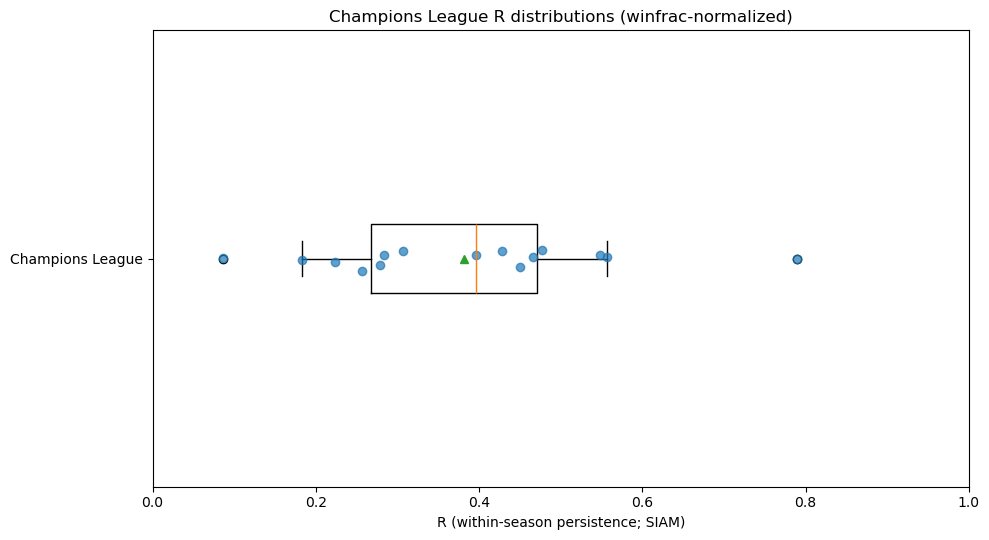

In [137]:
plot_siam_R_boxplot(gen_r_ucl_winfrac, metric_mode="winfrac")

/tmp/ipykernel_712895/3910459864.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(data, vert=False, labels=[title], manage_ticks=True, whis=[5,95], showmeans=True)


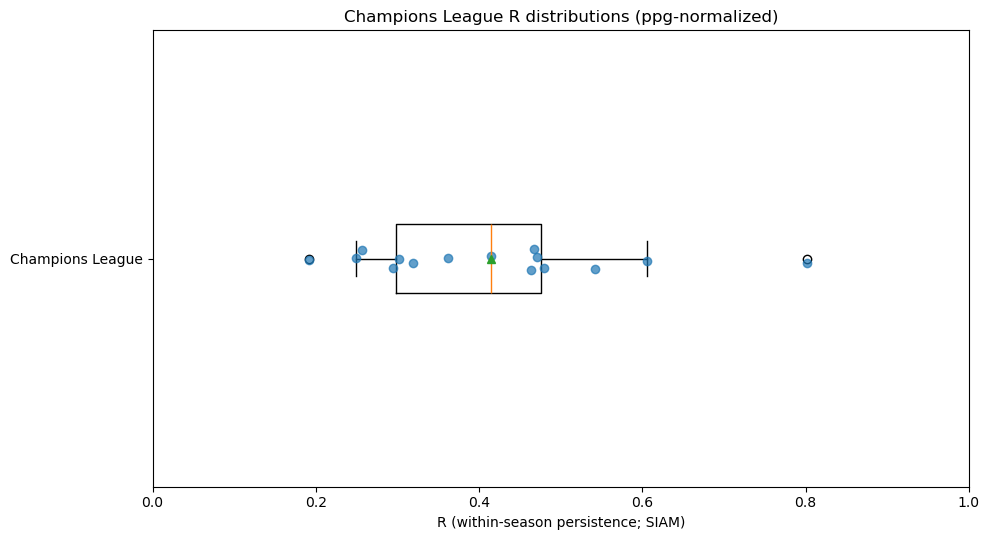

In [138]:
plot_siam_R_boxplot(gen_r_ucl_ppg, metric_mode="ppg")

In [139]:
# Summary Statistics
print(f"\nSIAM R-value (ppg) - Mean: {res_siam_ppg['R'].mean():.3f}, Median: {res_siam_ppg['R'].median():.3f}")
print(f"Generalized R-value (ppg) - Mean: {gen_r_ucl_ppg['R'].mean():.3f}, Median: {gen_r_ucl_ppg['R'].median():.3f}")

print(f"\nSIAM R-value (winfrac) - Mean: {res_siam_winfrac['R'].mean():.3f}, Median: {res_siam_winfrac['R'].median():.3f}")
print(f"Generalized R-value (winfrac) - Mean: {gen_r_ucl_winfrac['R'].mean():.3f}, Median: {gen_r_ucl_winfrac['R'].median():.3f}")



SIAM R-value (ppg) - Mean: 0.562, Median: 0.615
Generalized R-value (ppg) - Mean: 0.415, Median: 0.415

SIAM R-value (winfrac) - Mean: 0.518, Median: 0.606
Generalized R-value (winfrac) - Mean: 0.382, Median: 0.396


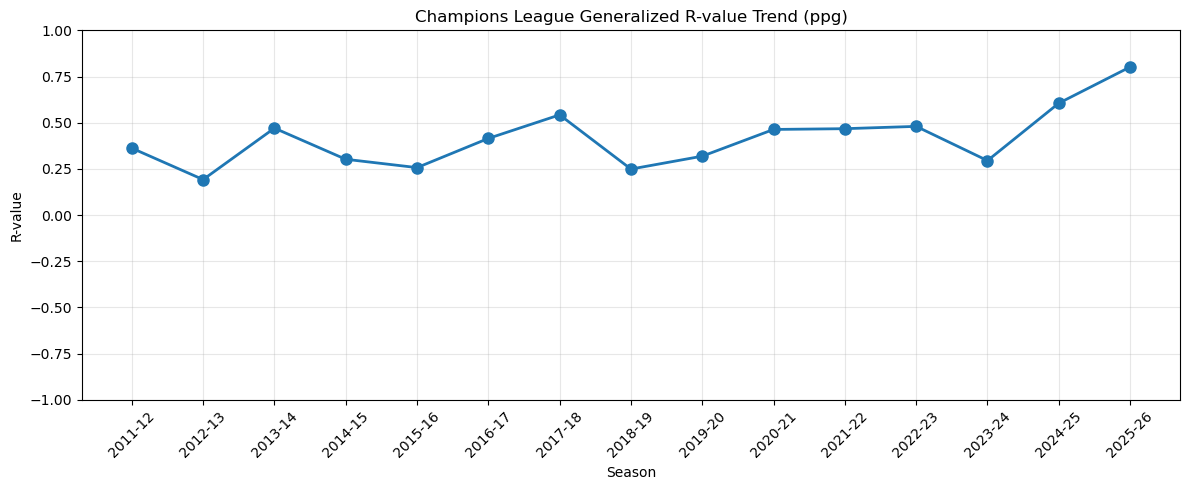

In [140]:
plot_ucl_trend(gen_r_ucl_ppg, "Champions League Generalized R-value Trend (ppg)")


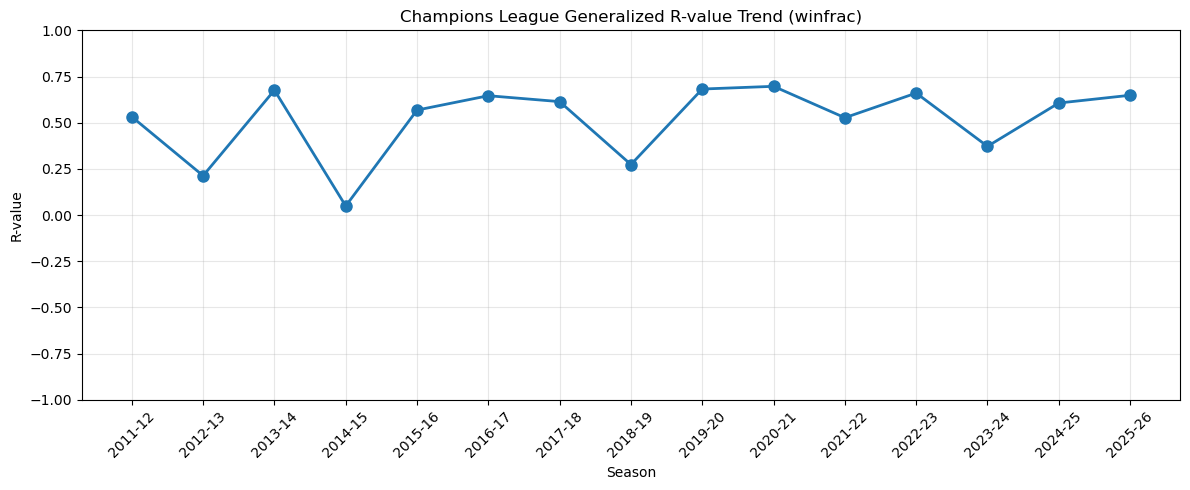

In [141]:
plot_ucl_trend(res_siam_winfrac, "Champions League Generalized R-value Trend (winfrac)")

/tmp/ipykernel_712895/3977839068.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data, vert=False, labels=labels, whis=[5, 95], showmeans=True, patch_artist=True)


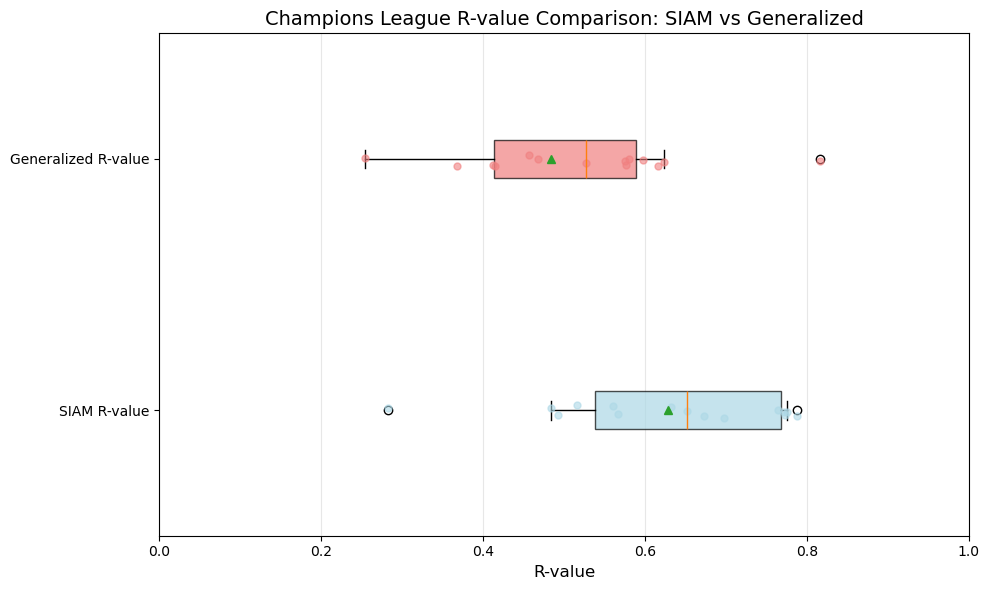

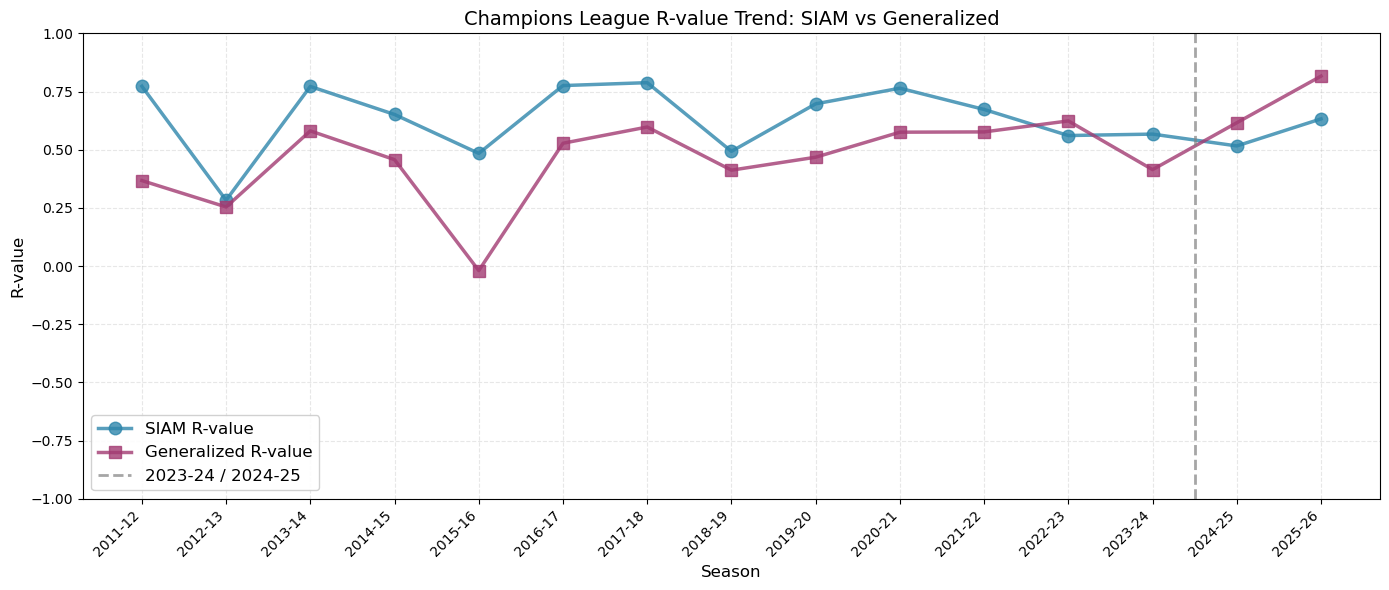

In [121]:
# 간단한 비교 시각화

# 1. Boxplot 비교
fig, ax = plt.subplots(figsize=(10, 6))

data = [res_siam_ppg['R'].dropna().values, gen_r_ucl_ppg['R'].dropna().values]
labels = ['SIAM R-value', 'Generalized R-value']

bp = ax.boxplot(data, vert=False, labels=labels, whis=[5, 95], showmeans=True, patch_artist=True)

# 색상 추가
colors = ['lightblue', 'lightcoral']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# 개별 시즌 포인트 오버레이
for i, (vals, label) in enumerate(zip(data, labels), start=1):
    if len(vals) > 0:
        y = np.full_like(vals, i, dtype=float) + (np.random.rand(len(vals)) - 0.5) * 0.06
        ax.plot(vals, y, "o", markersize=5, alpha=0.6, color=colors[i-1])

ax.set_xlabel("R-value", fontsize=12)
ax.set_title("Champions League R-value Comparison: SIAM vs Generalized", fontsize=14)
ax.set_xlim(0, 1)
ax.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# 2. Trend 비교
fig, ax = plt.subplots(figsize=(14, 6))

res_siam_sorted = res_siam_ppg.sort_values('season')
gen_r_sorted = gen_r_ucl_ppg.sort_values('season')
seasons = res_siam_sorted['season'].astype(str).values

ax.plot(seasons, res_siam_sorted['R'], 'o-', linewidth=2.5, markersize=9, 
        label='SIAM R-value', color='#2E86AB', alpha=0.8)
ax.plot(seasons, gen_r_sorted['R'], 's-', linewidth=2.5, markersize=9, 
        label='Generalized R-value', color='#A23B72', alpha=0.8)

try:
    idx_2023_24 = np.where(seasons == '2023-24')[0][0]
    idx_2024_25 = np.where(seasons == '2024-25')[0][0]
    # 두 시즌 사이의 중간 지점
    vline_pos = idx_2023_24 + 0.5
    ax.axvline(x=vline_pos, color='gray', linestyle='--', linewidth=2, alpha=0.7, 
               label='2023-24 / 2024-25')
except:
    # 인덱스로 직접 지정하는 방법 (seasons가 정렬되어 있다고 가정)
    # '2023-24' 다음이 '2024-25'라고 가정
    for i, season in enumerate(seasons):
        if season == '2023-24':
            ax.axvline(x=i+0.5, color='gray', linestyle='--', linewidth=2, alpha=0.7)
            break

ax.set_xlabel("Season", fontsize=12)
ax.set_ylabel("R-value", fontsize=12)
ax.set_title("Champions League R-value Trend: SIAM vs Generalized", fontsize=14)
ax.set_ylim(-1, 1)
ax.grid(alpha=0.3, linestyle='--')
ax.legend(loc='best', fontsize=12, framealpha=0.9)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipykernel_712895/3977839068.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data, vert=False, labels=labels, whis=[5, 95], showmeans=True, patch_artist=True)


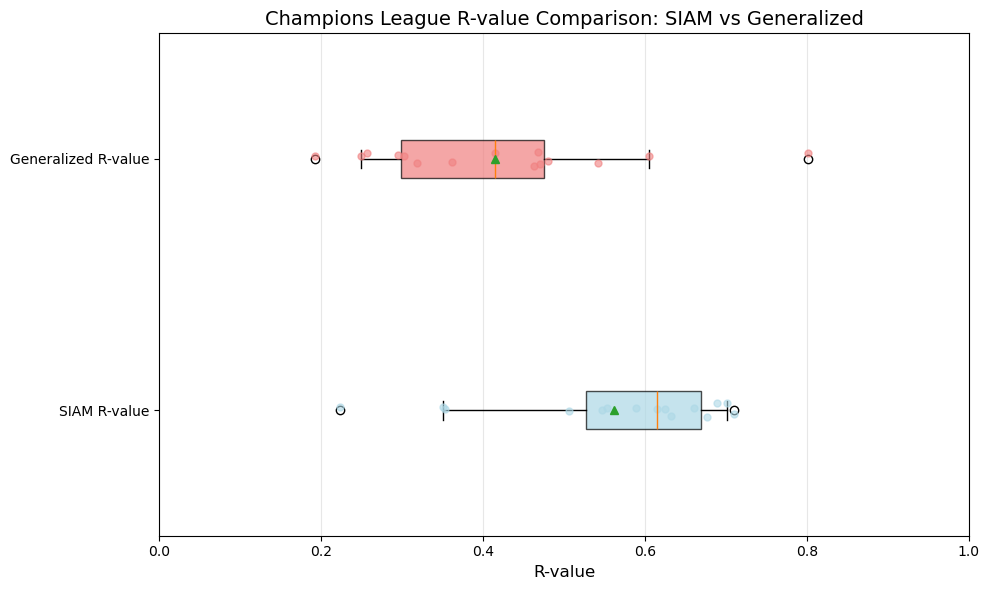

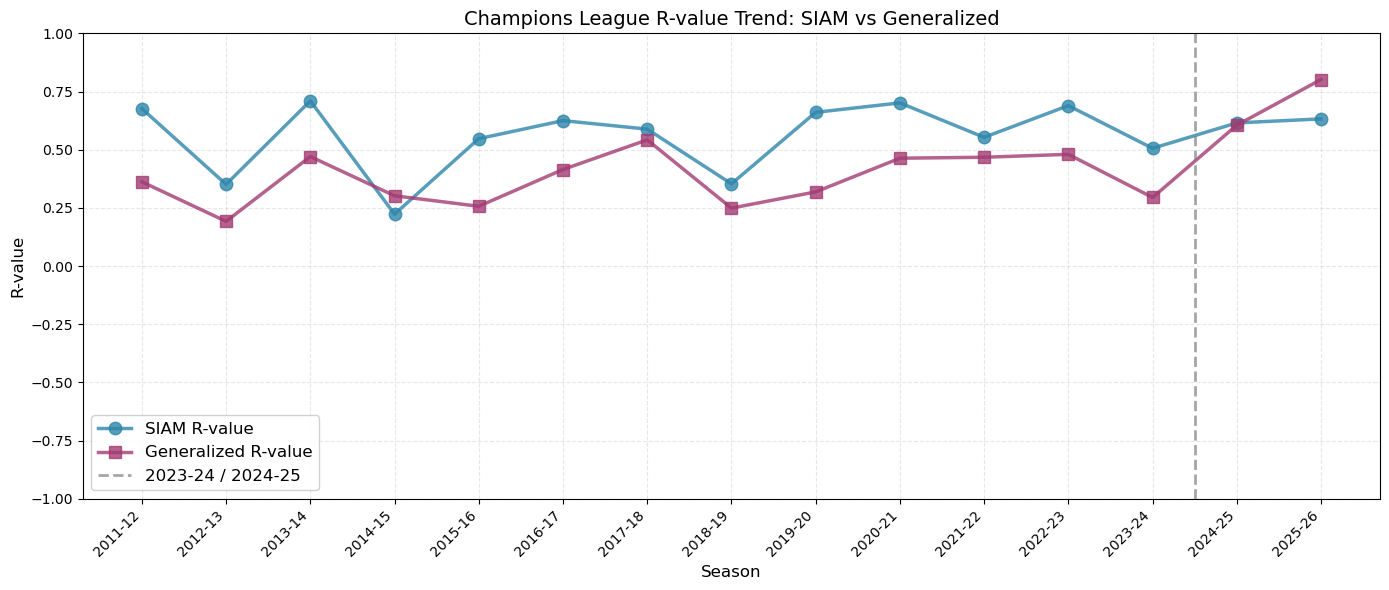

In [142]:
# 간단한 비교 시각화

# 1. Boxplot 비교
fig, ax = plt.subplots(figsize=(10, 6))

data = [res_siam_ppg['R'].dropna().values, gen_r_ucl_ppg['R'].dropna().values]
labels = ['SIAM R-value', 'Generalized R-value']

bp = ax.boxplot(data, vert=False, labels=labels, whis=[5, 95], showmeans=True, patch_artist=True)

# 색상 추가
colors = ['lightblue', 'lightcoral']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# 개별 시즌 포인트 오버레이
for i, (vals, label) in enumerate(zip(data, labels), start=1):
    if len(vals) > 0:
        y = np.full_like(vals, i, dtype=float) + (np.random.rand(len(vals)) - 0.5) * 0.06
        ax.plot(vals, y, "o", markersize=5, alpha=0.6, color=colors[i-1])

ax.set_xlabel("R-value", fontsize=12)
ax.set_title("Champions League R-value Comparison: SIAM vs Generalized", fontsize=14)
ax.set_xlim(0, 1)
ax.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# 2. Trend 비교
fig, ax = plt.subplots(figsize=(14, 6))

res_siam_sorted = res_siam_ppg.sort_values('season')
gen_r_sorted = gen_r_ucl_ppg.sort_values('season')
seasons = res_siam_sorted['season'].astype(str).values

ax.plot(seasons, res_siam_sorted['R'], 'o-', linewidth=2.5, markersize=9, 
        label='SIAM R-value', color='#2E86AB', alpha=0.8)
ax.plot(seasons, gen_r_sorted['R'], 's-', linewidth=2.5, markersize=9, 
        label='Generalized R-value', color='#A23B72', alpha=0.8)

try:
    idx_2023_24 = np.where(seasons == '2023-24')[0][0]
    idx_2024_25 = np.where(seasons == '2024-25')[0][0]
    # 두 시즌 사이의 중간 지점
    vline_pos = idx_2023_24 + 0.5
    ax.axvline(x=vline_pos, color='gray', linestyle='--', linewidth=2, alpha=0.7, 
               label='2023-24 / 2024-25')
except:
    # 인덱스로 직접 지정하는 방법 (seasons가 정렬되어 있다고 가정)
    # '2023-24' 다음이 '2024-25'라고 가정
    for i, season in enumerate(seasons):
        if season == '2023-24':
            ax.axvline(x=i+0.5, color='gray', linestyle='--', linewidth=2, alpha=0.7)
            break

ax.set_xlabel("Season", fontsize=12)
ax.set_ylabel("R-value", fontsize=12)
ax.set_title("Champions League R-value Trend: SIAM vs Generalized", fontsize=14)
ax.set_ylim(-1, 1)
ax.grid(alpha=0.3, linestyle='--')
ax.legend(loc='best', fontsize=12, framealpha=0.9)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()